<a href="https://colab.research.google.com/github/yucellgereklioglu/datasciencework/blob/main/parkinson_hasta_tahmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [5]:
df=pd.read_csv('/content/parkinsons data.csv')


In [6]:
le=LabelEncoder()
df['name']=le.fit_transform(df['name'])
df.tail(3)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
192,192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,194,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


Distribution and Box Plots for Numerical Features:


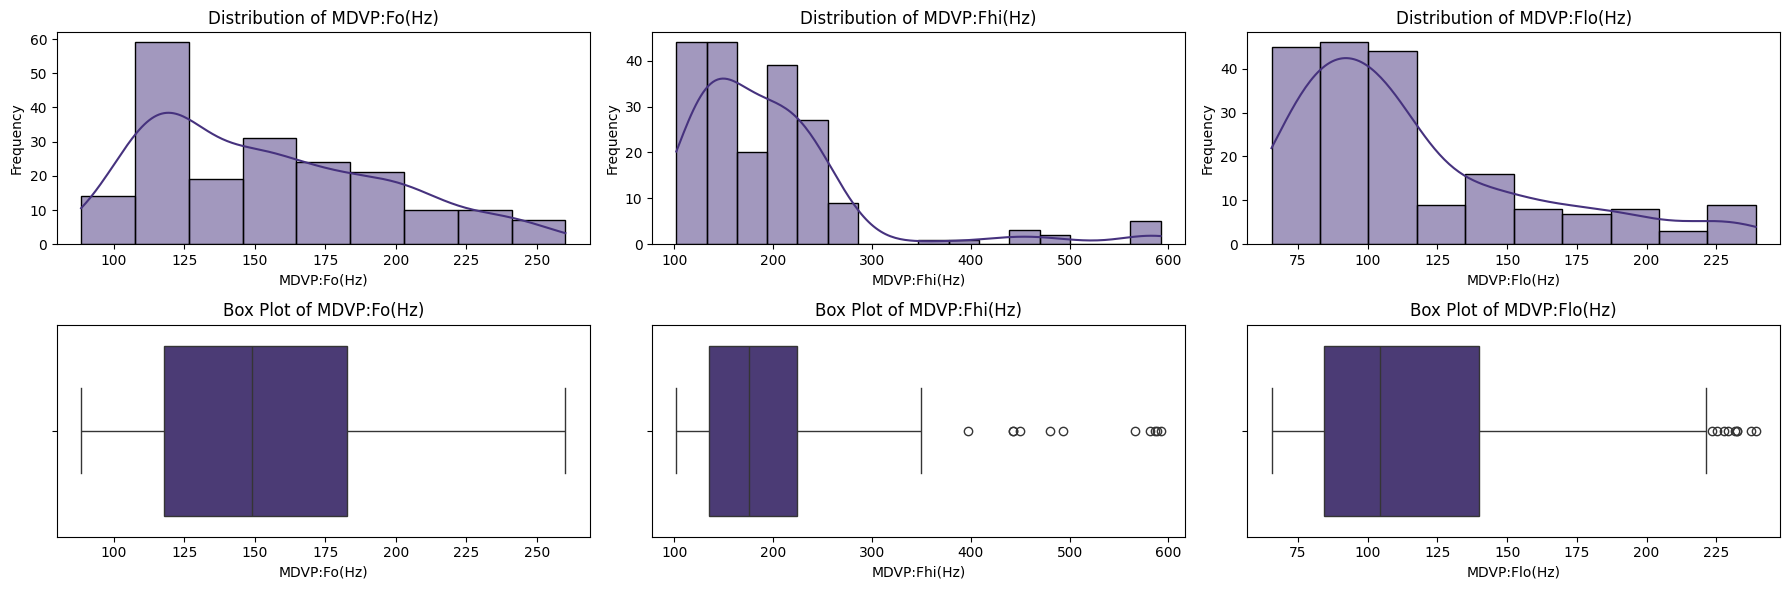

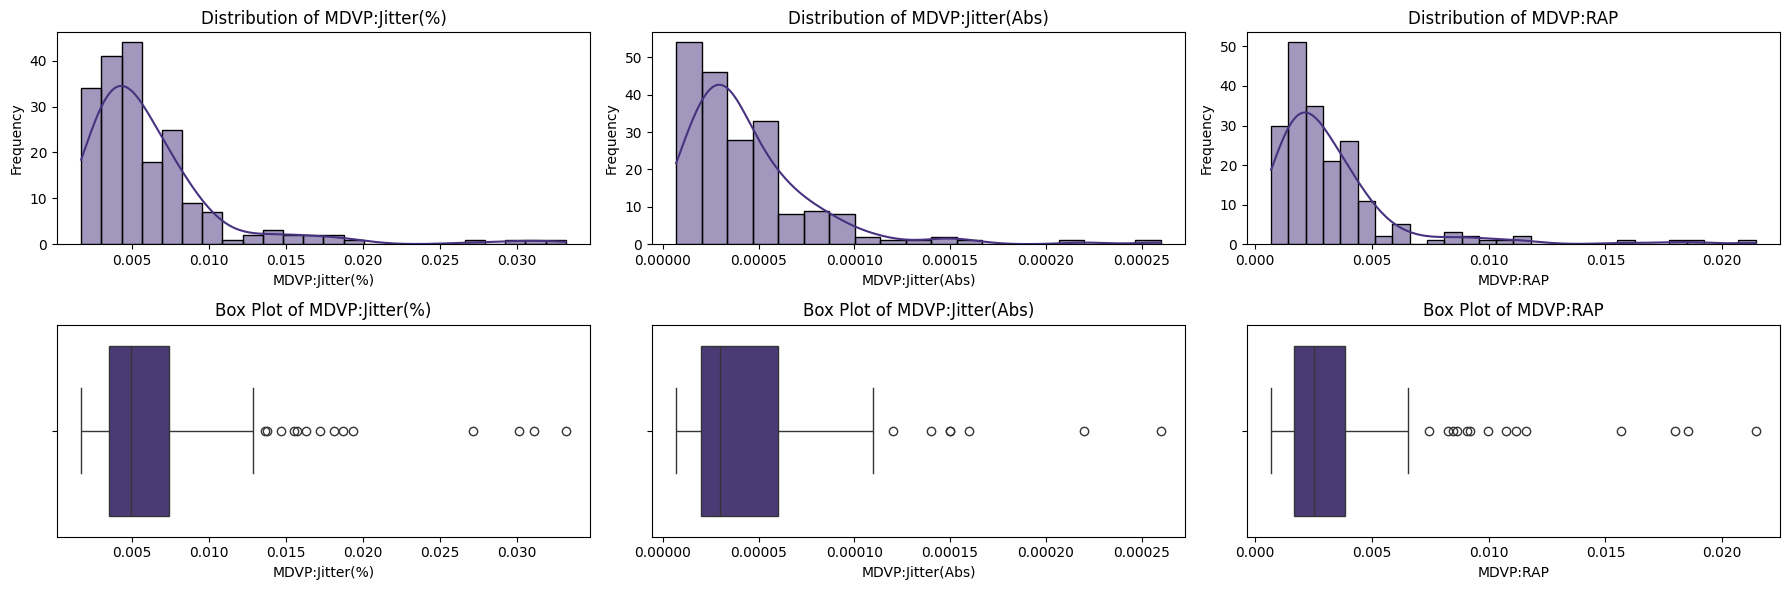

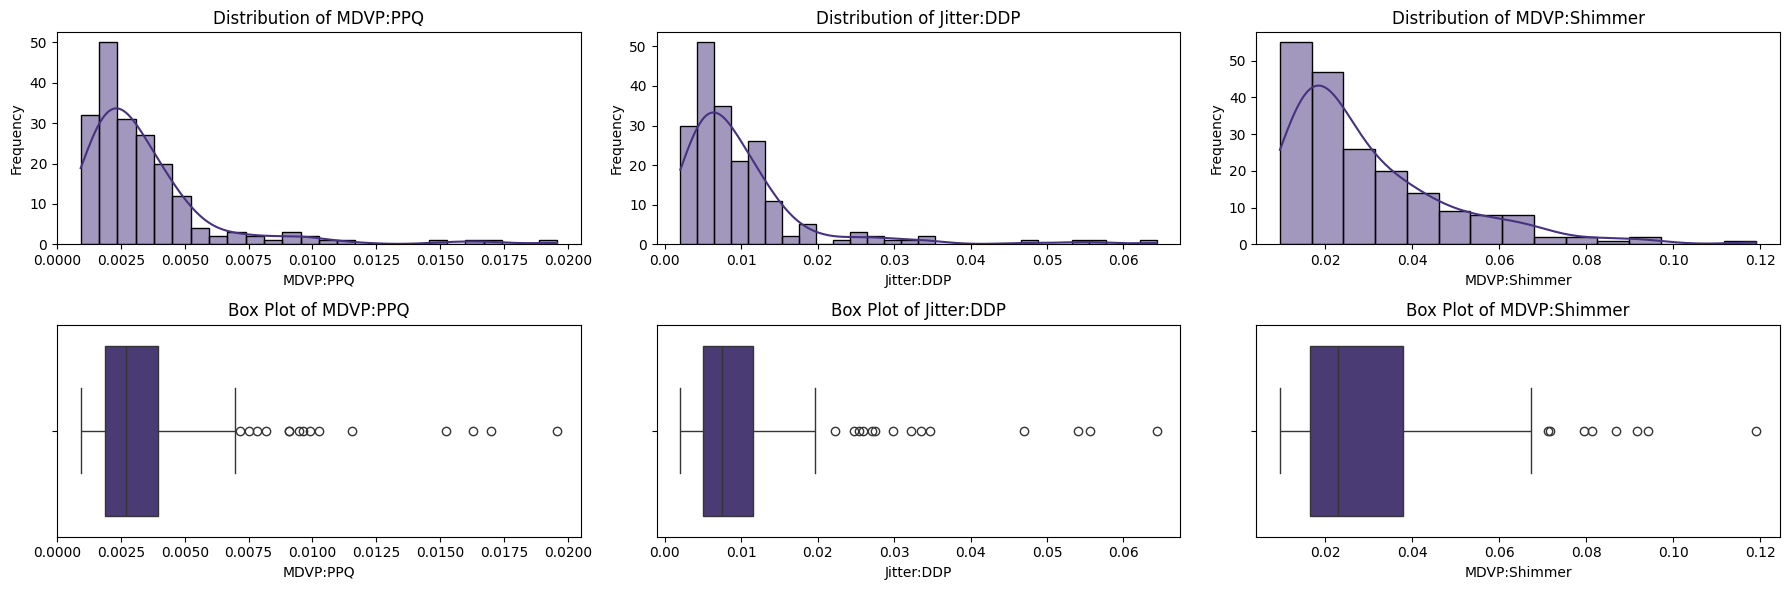

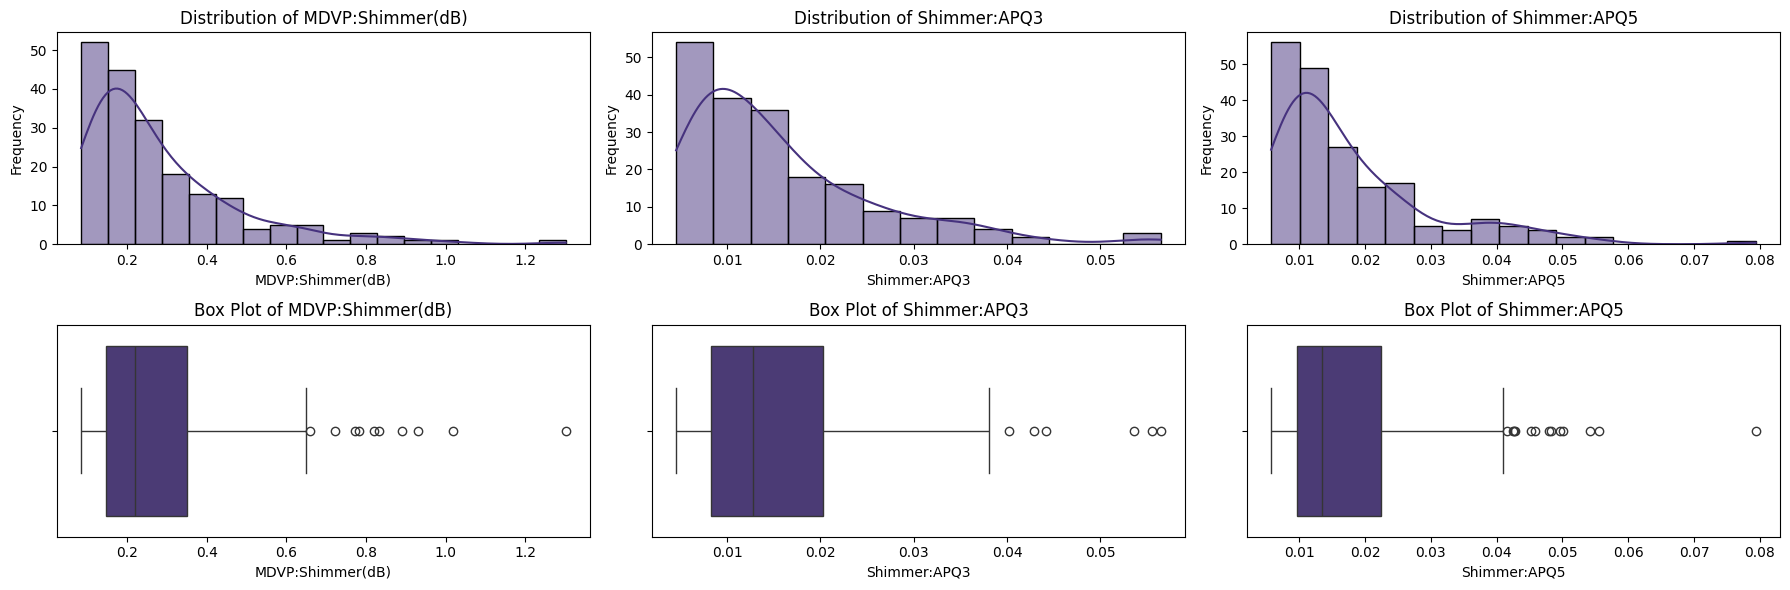

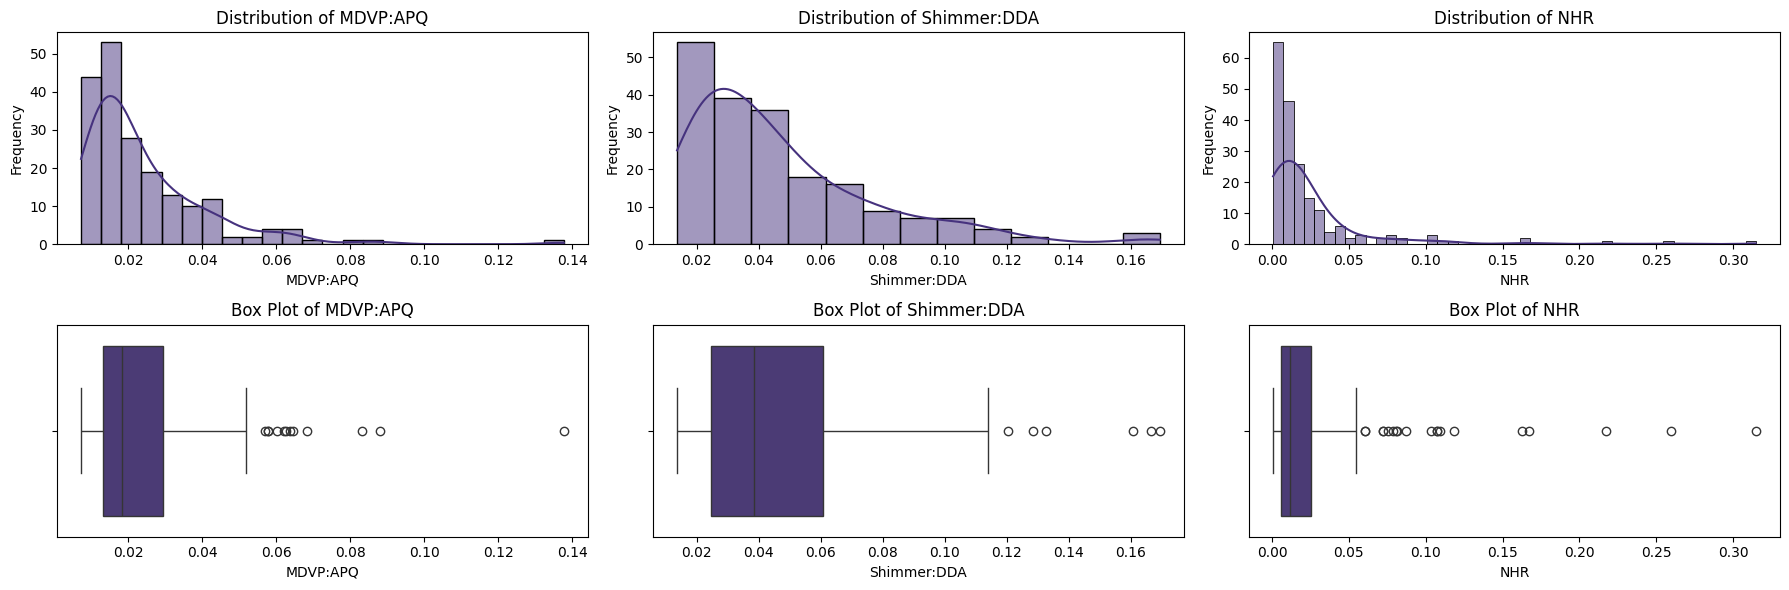

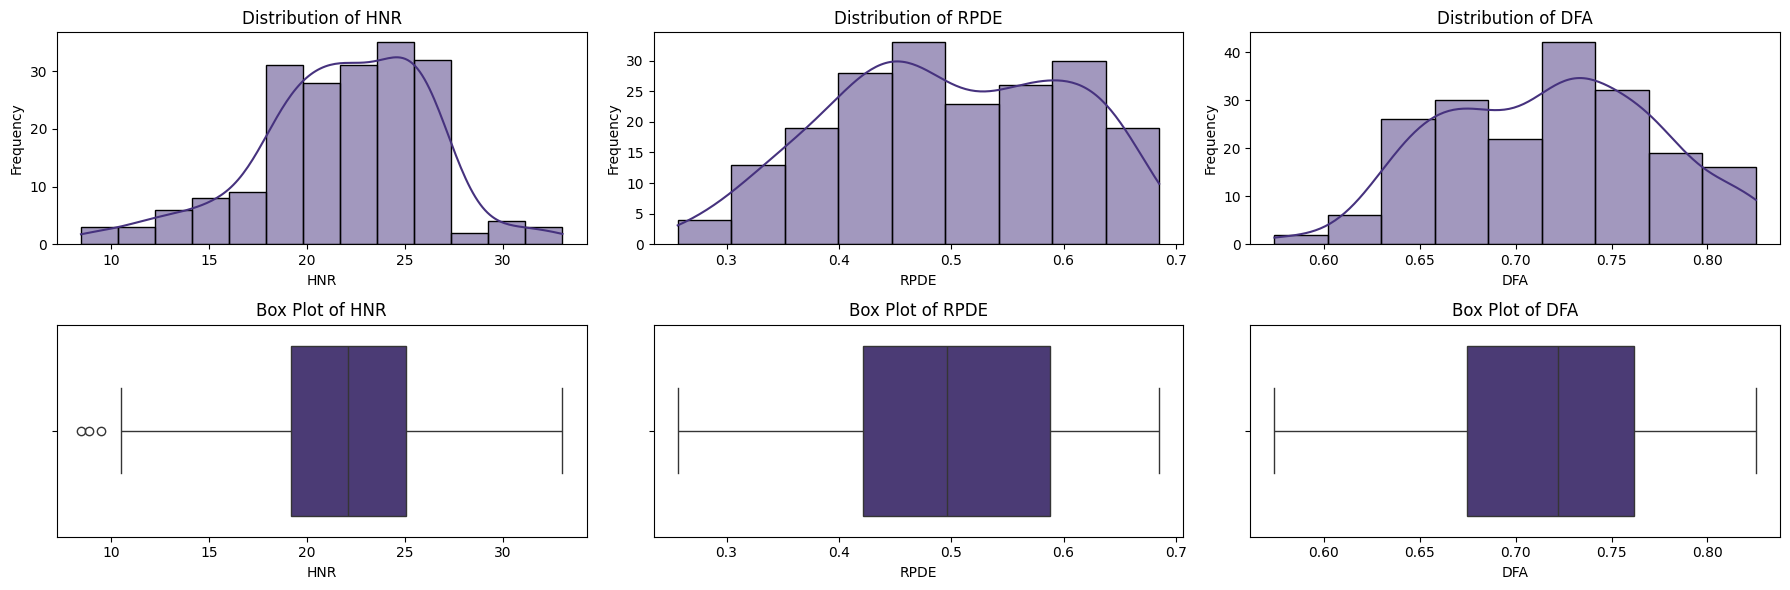

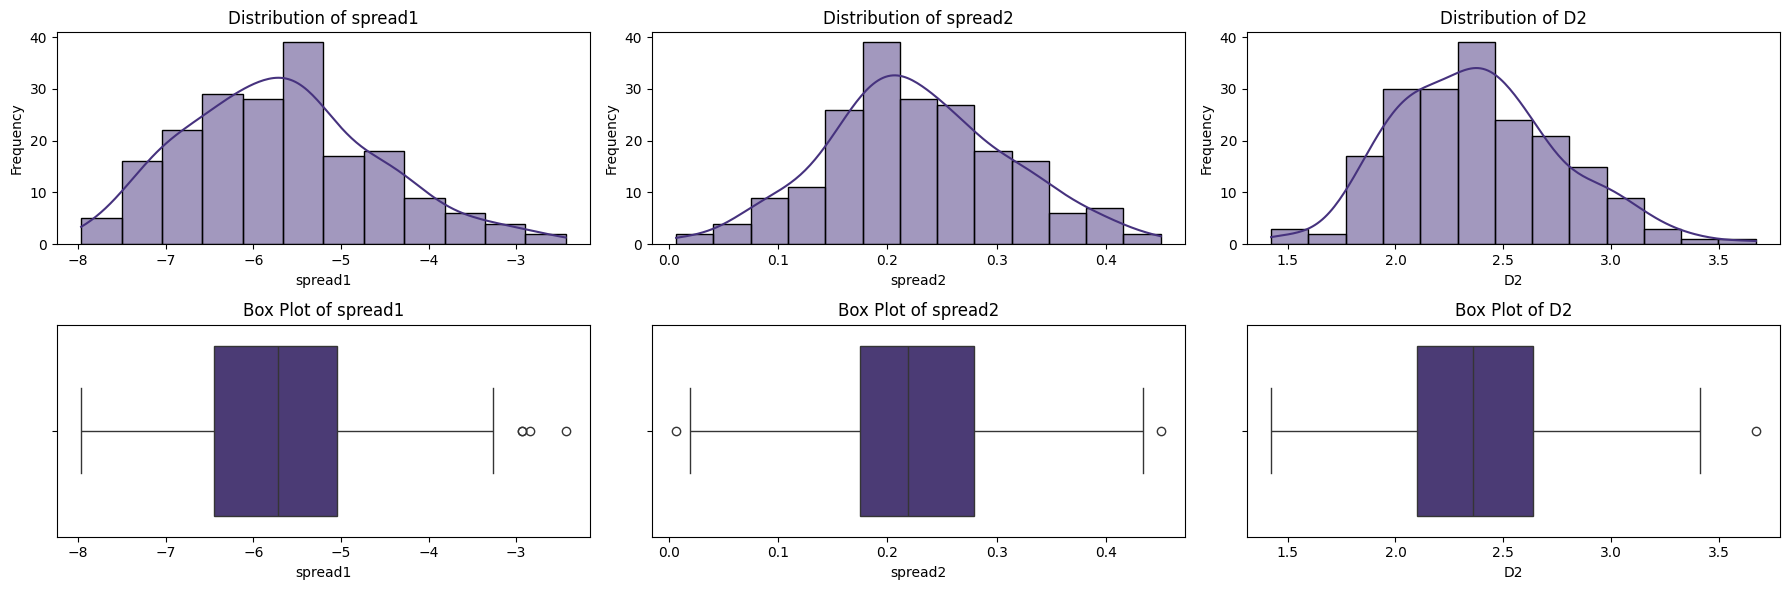

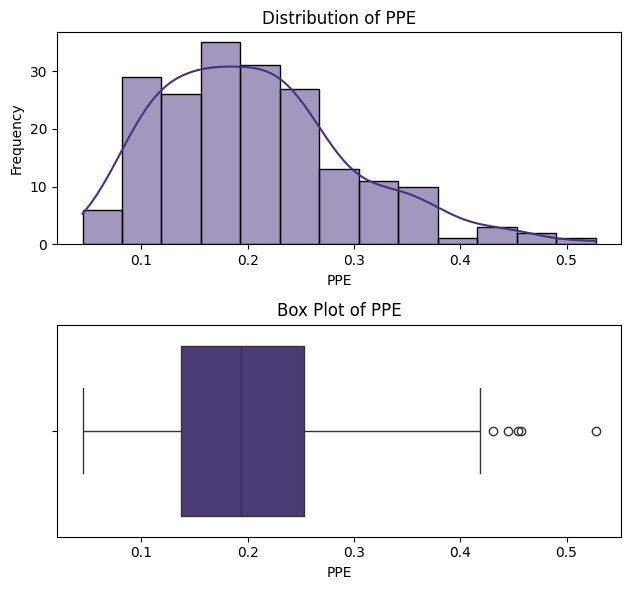


No categorical features found for count or pie plots.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.tolist()

# Remove 'name' and 'status' from the lists if they exist
if 'name' in numerical_features:
    numerical_features.remove('name')
if 'status' in numerical_features:
    numerical_features.remove('status')

sns.set_palette("viridis")

print("Distribution and Box Plots for Numerical Features:")
num_features_per_row = 3
num_rows = (len(numerical_features) + num_features_per_row - 1) // num_features_per_row

for i in range(num_rows):
    plt.figure(figsize=(18, 6))
    for j in range(num_features_per_row):
        feature_index = i * num_features_per_row + j
        if feature_index < len(numerical_features):
            feature = numerical_features[feature_index]

            plt.subplot(2, num_features_per_row, j + 1)
            sns.histplot(data=df, x=feature, kde=True)
            plt.title(f'Distribution of {feature}')
            plt.xlabel(feature)
            plt.ylabel('Frequency')

            plt.subplot(2, num_features_per_row, j + num_features_per_row + 1)
            sns.boxplot(data=df, x=feature)
            plt.title(f'Box Plot of {feature}')
            plt.xlabel(feature)

    plt.tight_layout()
    plt.show()

if categorical_features:
    print("\nCount and Pie Plots for Categorical Features:")
    for feature in categorical_features:
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        sns.countplot(data=df, x=feature)
        plt.title(f'Count of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')

        plt.subplot(1, 2, 2)
        df[feature].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
        plt.title(f'Distribution of {feature}')
        plt.ylabel('')

        plt.tight_layout()
        plt.show()
else:
    print("\nNo categorical features found for count or pie plots.")

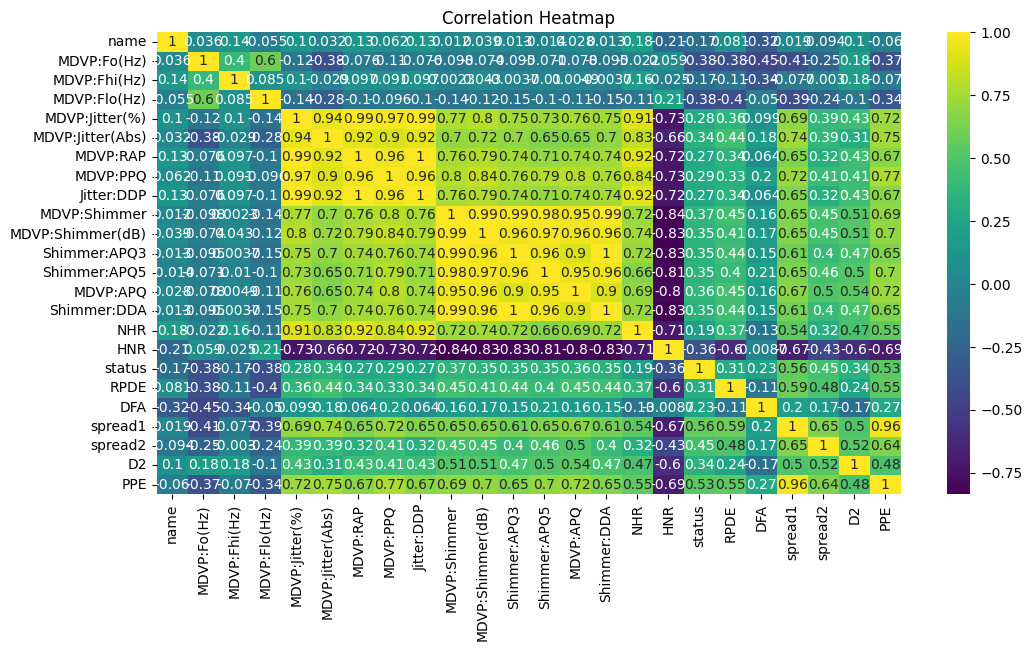

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
y = df["status"]
X = df.drop(["name", "status"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [28]:
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
dt_cv_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=skf)
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=skf)
dt_mean_accuracy = np.mean(dt_cv_scores)
rf_mean_accuracy = np.mean(rf_cv_scores)


In [30]:
print(rf_mean_accuracy,'random forest')
print(dt_mean_accuracy,'decision tree')

0.9057471264367816 random forest
0.8250574712643676 decision tree


**Reasoning**:
Perform k-fold cross-validation on the scaled training data using the initialized Decision Tree model and StratifiedKFold.



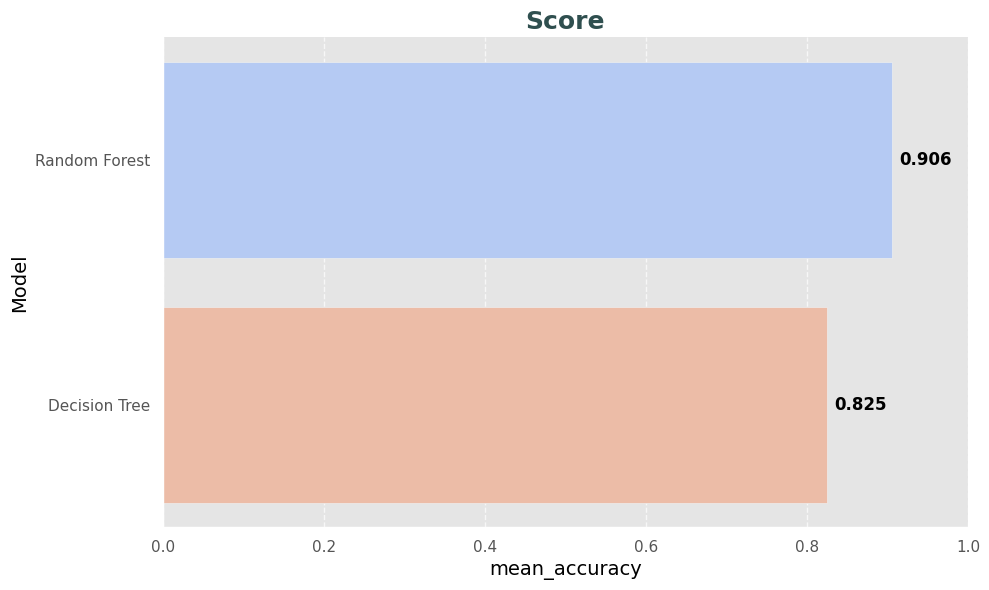

In [50]:
plt.style.use('ggplot')
model_names = ['Random Forest', 'Decision Tree']
mean_accuracies = [rf_mean_accuracy, dt_mean_accuracy]

custom_palette = sns.color_palette("coolwarm", len(model_names))
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=mean_accuracies, y=model_names, palette=custom_palette)
plt.title('Score',
          fontsize=18, fontweight='bold', color='darkslategray')

plt.xlabel('mean_accuracy', fontsize=14, color='black')
plt.ylabel('Model', fontsize=14, color='black')

plt.xlim(0, 1)
for p in ax.patches:
    ax.annotate(f'{p.get_width():.3f}',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points',
                fontsize=12, color='black', fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0)
sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()

diğer adımda başarı skoru hesaplama

In [69]:
y_pred_rf = best_rf_model.predict(X_test_scaled)
y_pred_dt = best_dt_model.predict(X_test_scaled)
accuracy_df=pd.DataFrame({'Model':['Random Forest','Decision Tree'],'Accuracy':[accuracy_score(y_test,y_pred_rf),accuracy_score(y_test,y_pred_dt)]})
display(accuracy_df)

,Model,Accuracy
0,Random Forest,0.92
1,Decision Tree,0.77


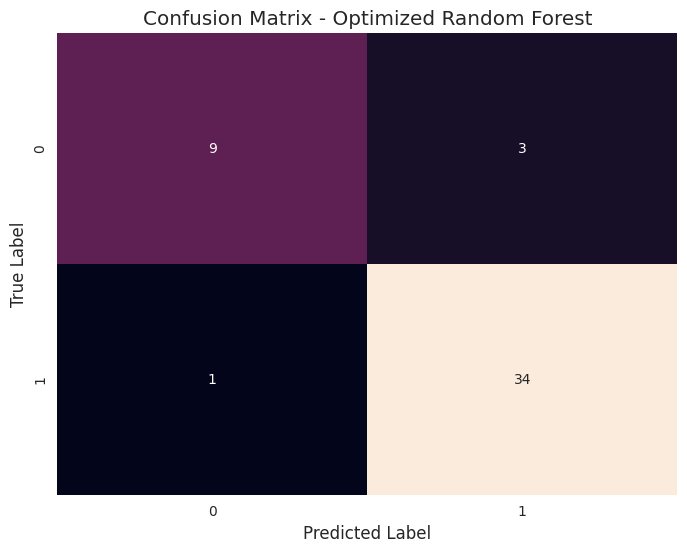

In [45]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='rocket', cbar=False)
plt.title('Confusion Matrix - Optimized Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

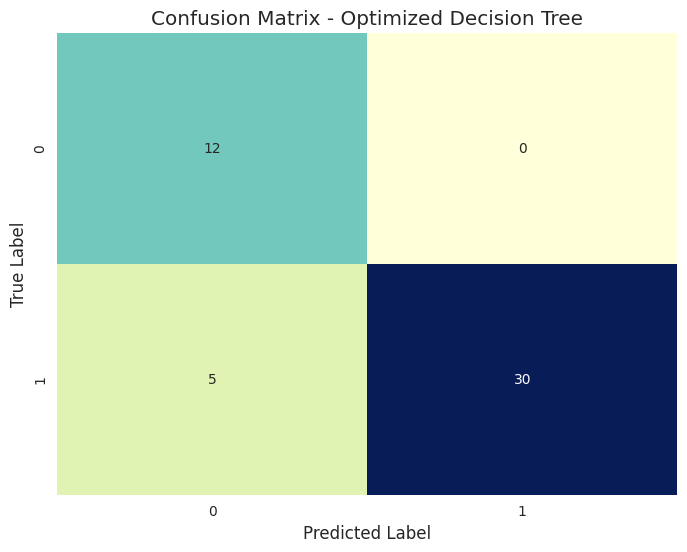

In [46]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title('Confusion Matrix - Optimized Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import accuracy_score
X_train_rnn = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_rnn = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
model_rnn = Sequential([
    SimpleRNN(units=32, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), activation='relu'),
    Dense(units=1, activation='sigmoid') # Output layer for binary classification
])
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("Training the RNN model...")
history = model_rnn.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
print("\nEvaluating the RNN model on the test data...")
loss, accuracy_rnn = model_rnn.evaluate(X_test_rnn, y_test, verbose=0)
print(f"Accuracy of the RNN model on the test data: {accuracy_rnn:.4f}")

Training the RNN model...
Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5129 - loss: 0.7856 - val_accuracy: 0.5875 - val_loss: 0.7253
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5973 - loss: 0.6851 - val_accuracy: 0.6687 - val_loss: 0.6634
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6920 - loss: 0.6267 - val_accuracy: 0.7000 - val_loss: 0.6141
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7218 - loss: 0.5611 - val_accuracy: 0.7188 - val_loss: 0.5739
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7879 - loss: 0.4947 - val_accuracy: 0.7563 - val_loss: 0.5410
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7976 - loss: 0.4648 - val_accuracy: 0.7688 - val_loss: 0.5097
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8517 - loss: 0.4170 - val_accuracy: 0.7937 - val_loss: 0.4827
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8360 - loss: 0.4001 - val

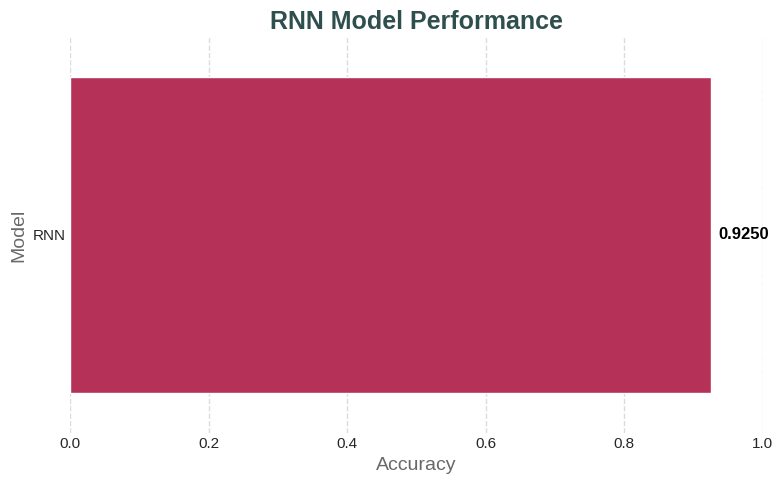

In [60]:
model_names = ['RNN']
accuracies = [accuracy_rnn]
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=accuracies, y=model_names, palette='rocket')

plt.title('RNN Model Performance',
          fontsize=18, fontweight='bold', color='darkslategray')
plt.xlabel('Accuracy', fontsize=14, color='dimgray')
plt.ylabel('Model', fontsize=14, color='dimgray')
plt.xlim(0, 1)

for p in ax.patches:
    ax.annotate(f'{p.get_width():.4f}',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points',
                fontsize=12, color='black', fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

In [78]:
predictionrnn=model_rnn.predict(X_test_rnn)
predictiondata=np.round(predictiondata)
predictiondata[:5]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step 


array([[1.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [79]:
predictiondt=best_dt_model.predict(X_test_scaled)
predictiondt[:5]

array([1, 0, 0, 0, 0])

In [80]:
predictionrf=best_rf_model.predict(X_test_scaled)
predictionrf[:5]

array([1, 0, 0, 0, 1])